In [7]:
from torchvision import models
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision
 
#dir(models)
alexnet = models.alexnet(pretrained=True)
#print(alexnet)

In [8]:
# pre-process the input image
# AlexNet and ResNet.
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

# Import pic
from PIL import Image
img = Image.open("peppers.png")

#pre-process the image 
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

#model inference 
alexnet.eval()
out = alexnet(batch_t)
print(out.shape )


torch.Size([1, 1000])


Let’s try to understand what happened in the above code snippet.

Line [1]: Here we are defining a variable transform which is a combination of all the image transformations to be carried out on the input image.

Line [2]: Resize the image to 256×256 pixels.

Line [3]: Crop the image to 224×224 pixels about the center.

Line [4]: Convert the image to PyTorch Tensor data type.

Line [5-7]: Normalize the image by setting its mean and standard deviation to the specified values.



In [11]:
# get labels 
with open("imagenet1000_clsidx_to_labels.txt") as f:
    #read() 方法用于从文件读取指定的字节数，如果未给定或为负则读取所有
    idx2label = eval(f.read())  ## dict 

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100    # tensor
_, indices = torch.sort(out, descending=True)
[(idx2label[idx], percentage[idx].item()) for idx in indices[0][:3].tolist()]



[('cucumber, cuke', 32.823604583740234),
 ('bell pepper', 20.954301834106445),
 ('crate', 4.707828044891357)]

In [12]:
#ResNet-152 
#load model and put it in eval mode
resnet152 = models.resnet152(pretrained=True)
resnet152.eval()
out = resnet152(batch_t)

#Top 3 prediction 
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(idx2label[idx], percentage[idx].item()) for idx in indices[0][:3].tolist()]

resnet152

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
# Choose VGG-16 
vgg=models.vgg16(pretrained=True)
vgg.eval()
out=vgg(batch_t)

_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(idx2label[idx], percentage[idx].item()) for idx in indices[0][:3].tolist()]


[('bell pepper', 99.32003784179688),
 ('cucumber, cuke', 0.23650312423706055),
 ('Granny Smith', 0.12514065206050873)]

In [15]:
# visualizing
#vgg.features

class LayerActivations:
    features = None
 
    def __init__(self, model, layer_num):
        self.hook = model[layer_num].register_forward_hook(self.hook_fn)
 
    def hook_fn(self, module, input, output):
        self.features = output.cpu()
 
    def remove(self):
        self.hook.remove()

In [16]:
LayerActivations(vgg.features, 2) 

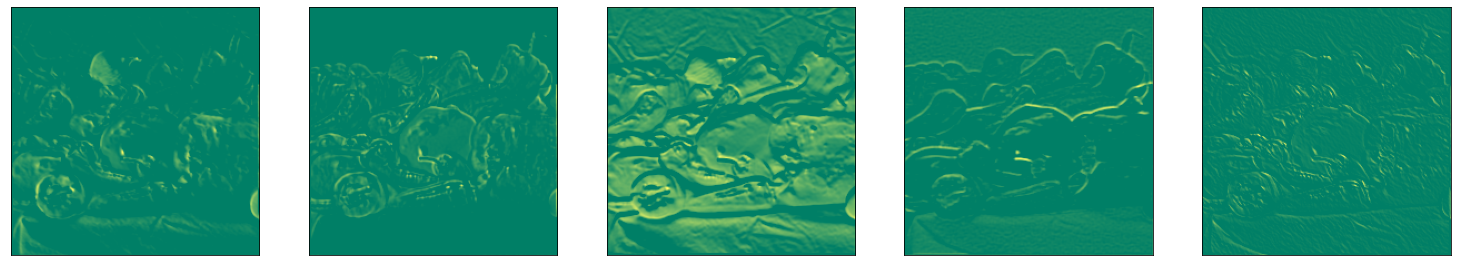

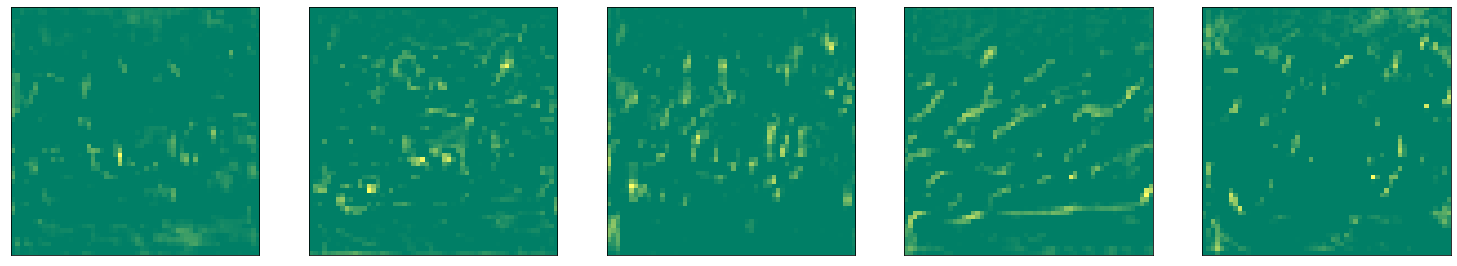

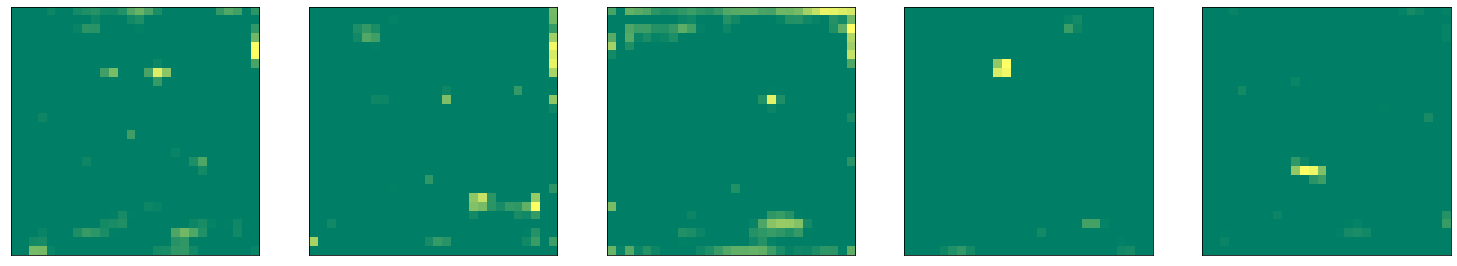

In [38]:
def imageshow(Num):
    
    conv_out = LayerActivations(vgg.features, Num)  # get Num-th output  
    out=vgg(batch_t)

    img = next(iter(batch_t))[0]
    act = conv_out.features  
    conv_out.remove()  
 
    # visulization 
    fig = plt.figure(figsize=(20, 50))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0, wspace=0.2)
    for i in range(5):
        ax = fig.add_subplot(10, 5, i+1, xticks=[], yticks=[])
        ax.imshow(act[0][i].detach().numpy(), cmap="summer")
    
    plt.show()

imageshow(2)
imageshow(10)
imageshow(22)
    

torch.Size([1, 64, 224, 224])


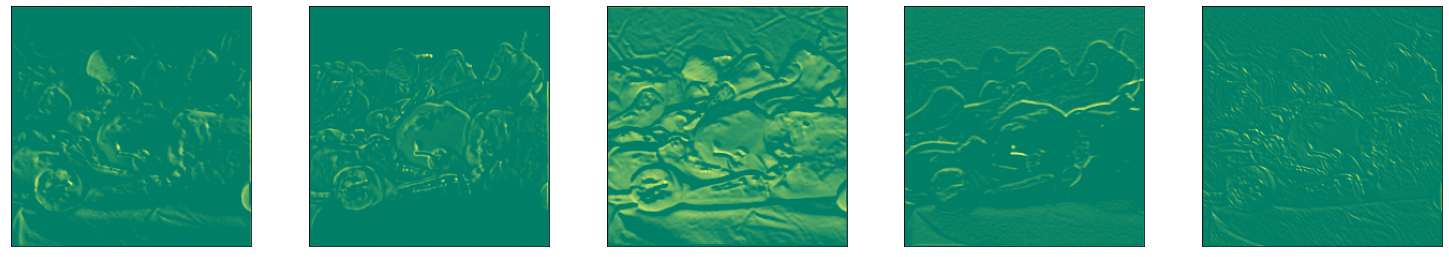

In [32]:
conv_out = LayerActivations(vgg.features, 2)  # 提出第 n个卷积层的输出 
out=vgg(batch_t)

img = next(iter(batch_t))[0]
act = conv_out.features  # act 即 第0层输出的特征
print(act.shape)
conv_out.remove()  #
act = conv_out.features  # act 即 第0层输出的特征
 
# visualizing 
fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0, wspace=0.2)
for i in range(5):
    ax = fig.add_subplot(12, 5, i+1, xticks=[], yticks=[])
    ax.imshow(act[0][i].detach().numpy(), cmap="summer")
plt.show()

In [6]:
resnet18 = models.resnet18(pretrained=True)
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  